<a href="https://colab.research.google.com/github/drawcodeboy/first_ML_DL/blob/main/firstMLDL_03_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Linear Regression
>* KNN의 한계
>* 선형 회귀(Linear Regression)란?
>* Linear Regression의 대안: Polynomial Regression

# K-최근접 이웃의 한계

In [3]:
# 데이터 준비

import numpy as np

perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )

In [4]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    perch_length, perch_weight, random_state = 42
)

train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

In [5]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor(n_neighbors = 3)

knr.fit(train_input, train_target)

KNeighborsRegressor(n_neighbors=3)

In [6]:
print(knr.predict([[50]]))

# 훨씬 더 많이 나갈 것으로 예상한 농어의 무게가 1033.3333333g으로 예측된다

[1033.33333333]


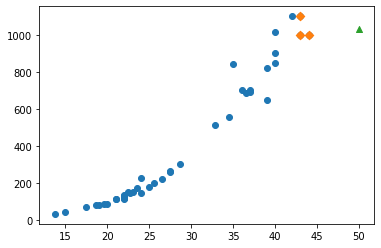

In [7]:
import matplotlib.pyplot as plt

distances, indexes = knr.kneighbors([[50]])

plt.scatter(train_input, train_target)
plt.scatter(train_input[indexes], train_target[indexes], marker = 'D')
plt.scatter(50, 1033.33333333, marker = '^')
plt.show()

>* 위 산점도를 보면 50cm 샘플 근처에 있는 샘플들은 45cm 근방이기 때문에 45cm 근방에 있는 샘플들의 평균을 구하여 예측값을 내놓는다.
- -> <b>KNN의 한계</b>

#Linear Regression
>* feature가 하나인 경우 <b>어떤 직선을 학습</b>하는 알고리즘
- 하나의 직선을 그리려면 <b>y = a * x + b</b>와 같은 식이 필요함 여기서 x를 feature, y를 결과값이라 본다면 모델을 통해서 a와 b를 찾는 것이다.
- <b>a = coefficient(계수), b = intercept(절편)</b>
- 머신러닝을 통해 모델이 찾은 coef_와 intercept_를 <b>Model Parameter</b>라고 한다.
- 이런 것처럼 알고리즘의 훈련 과정은 최적의 Model Paremeter를 찾는 것과 같은데 이를 <b>모델 기반 학습</b>이라 하고, KNN과 같이 Model Parameter가 없는 경우를 <b>사례 기반 학습</b>이라 한다.

#다항 회귀(Polynomial Regression)
>* Linear Regression에서 현실에서 일어날 수 없는 일에 대한 데이터를 없애고자 <b>최적의 직선</b>이 아닌 <b>최적의 곡선</b>을 찾는 것이 맞다고 판단

In [28]:
# 모델 학습 및 KNN의 한계에 부딪히던 데이터 predict

from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr.fit(train_input, train_target)

print(lr.predict([[50]]))
# -> 1033.3333333에서 1241.83860323로 예측

[1241.83860323]


In [29]:
# lr의 객체 coef_, intercept_ 속성에 저장되어있다.

print(lr.coef_, lr.intercept_)

[39.01714496] -709.0186449535477


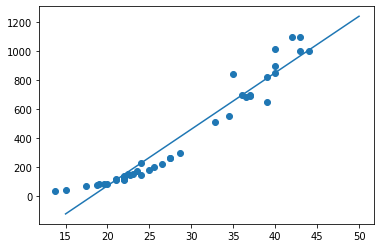

In [30]:
# 농어의 길이 15cm에서 50cm까지의 직선을 산점도로 그려보자.

plt.scatter(train_input, train_target)
plt.plot([15, 50], [15 * lr.coef_ + lr.intercept_, 50 * lr.coef_ + lr.intercept_])
plt.show()

In [31]:
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))

# 테스트 세트에 대한 점수가 너무 작음 -> Overfitting으로 볼 수도 있지만
# 훈련 세트에 대한 점수가 그렇게 크지도 않다.

# 산점도에서 특이사항 발견 x가 15일 때, 음수값이 측정되는데 이는 현실에서 있을 수 없는 일

0.939846333997604
0.8247503123313558


In [33]:
# Polynomial Regression으로 학습시켜보자.

train_poly = np.column_stack((train_input ** 2, train_input)) # 제곱한 항과 1차 항을 set으로 만듬
test_poly = np.column_stack((test_input ** 2, test_input))

print(train_poly.shape, test_poly.shape) # shape 출력 결과 특이사항 없음

(42, 2) (14, 2)


In [36]:
lr = LinearRegression()
lr.fit(train_poly, train_target)

print(lr.predict([[50 ** 2, 50]])) # 1573.98423528으로 선형 회귀를 한 것보다 높게 나옴

print(lr.coef_, lr.intercept_) 
# 이 모델은 데이터를 학습하여 다음과 같은 Model Parameter를 만들어냈다.
# predict_value = 1.01433211 * (feature)^2 - 21.55792498 * feature + 116.0502107827827

[1573.98423528]
[  1.01433211 -21.55792498] 116.0502107827827


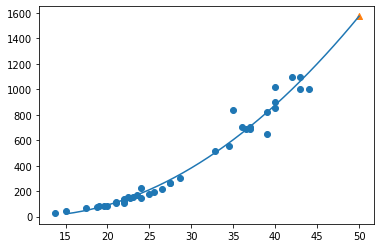

In [37]:
point = np.arange(15, 50 + 1)

plt.scatter(train_input, train_target)
plt.plot(point, lr.coef_[0] * point ** 2 + lr.coef_[1] * point + lr.intercept_)
plt.scatter(50, 1574, marker = '^') # 농어 50cm에 대한 실제 무게 scatter plot에 입력
plt.show()

In [39]:
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

# 아직도 Underfitting이 남아있다.

0.9706807451768623
0.9775935108325122
